In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('dataset/stock_data.csv')

In [3]:
data.head(10)

Date       High        Low       Open      Close     Volume  \
0  2010-01-04  93.750000  92.012497  93.562500  92.775002  1632148.0   
1  2010-01-05  95.250000  92.637497  93.125000  94.862503  5037896.0   
2  2010-01-06  95.724998  91.250000  95.025002  92.000000  3992320.0   
3  2010-01-07  92.974998  89.800003  92.974998  90.037498  3665940.0   
4  2010-01-08  90.750000  87.312500  90.750000  87.937500  6241492.0   
5  2010-01-11  90.375000  87.949997  87.949997  88.812500  5742332.0   
6  2010-01-12  93.449997  88.750000  89.250000  91.962502  9051468.0   
7  2010-01-13  94.750000  90.025002  91.962502  94.487503  8064504.0   
8  2010-01-14  95.937500  91.400002  94.974998  92.525002  7763244.0   
9  2010-01-15  93.474998  91.537498  92.875000  92.349998  2749332.0   

   Adj Close Company Name  
0  73.478745          HCL  
1  75.132080          HCL  
2  72.864944          HCL  
3  71.310638          HCL  
4  69.647415          HCL  
5  70.340424          HCL  
6  72.835266          HCL  
7  74.835060          HCL  
8  73.280762          HCL  
9  73.142151          HCL

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          12316 non-null  object 
 1   High          12316 non-null  float64
 2   Low           12316 non-null  float64
 3   Open          12316 non-null  float64
 4   Close         12316 non-null  float64
 5   Volume        12316 non-null  float64
 6   Adj Close     12316 non-null  float64
 7   Company Name  12316 non-null  object 
dtypes: float64(6), object(2)
memory usage: 769.9+ KB


In [5]:
data.describe()

High           Low          Open         Close        Volume  \
count  12316.000000  12316.000000  12316.000000  12316.000000  1.231600e+04   
mean     478.864214    467.733492    473.549481    473.181495  4.338850e+06   
std      264.666317    260.207176    262.599007    262.390552  4.735656e+06   
min       85.500000     79.387497     79.387497     82.550003  0.000000e+00   
25%      311.000000    301.681259    306.131241    306.359459  1.804694e+06   
50%      437.354309    427.177078    432.500000    432.299988  3.295398e+06   
75%      559.505325    545.787796    552.725006    552.218765  5.756494e+06   
max     1602.361206   1581.112671   1599.835205   1594.832642  2.213713e+08   

          Adj Close  
count  12316.000000  
mean     448.803105  
std      260.715739  
min       65.380447  
25%      289.576492  
50%      404.845276  
75%      529.312561  
max     1583.771851

In [6]:
data.isnull().sum()

Date            0
High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
Company Name    0
dtype: int64

In [7]:
print("Shape: ",data.shape)

Shape:  (12316, 8)


In [10]:
data['Company Name'].value_counts()

HCL           2464
M&M           2463
TATAMOTORS    2463
HDFCBANK      2463
RELIANCE      2463
Name: Company Name, dtype: int64

In [204]:
data['Date'] = pd.to_datetime(data['Date'])

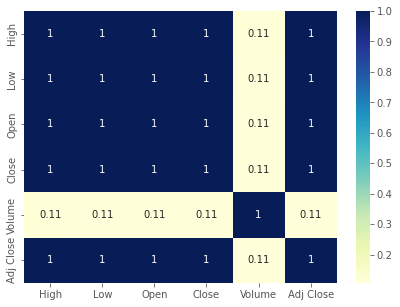

In [202]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.savefig('EDA_images/Correlation.jpg')

In [11]:
figure1 = px.line(data, x='Date', y='Close', width=900, height=600, title='Variation in closing price', color='Company Name')
figure1.show()

In [12]:
figure2 = px.line(data, x='Date', y='Open', width=900, height=600, title='Variation in Opening price', color='Company Name')
#figure2.write_image('EDA_images/OpeningPrice.png')
figure2.show()

In [13]:
figure3 = px.line(data, x='Date', y='Volume', width=900, height=600, title='Variation in Volume', color='Company Name')
#figure3.write_image('EDA_images/Volume.png')
figure3.show()

In [14]:
hcl = data[data['Company Name']=='HCL'].groupby("Date").sum()
mnm = data[data['Company Name']=='M&M'].groupby("Date").sum()
tatamotors = data[data['Company Name']=='TATAMOTORS'].groupby("Date").sum()
hdfcbank = data[data['Company Name']=='HDFCBANK'].groupby("Date").sum()
reliance = data[data['Company Name']=='RELIANCE'].groupby("Date").sum()

In [16]:
hcl['Daily_Percentage_Change']=hcl['Close'].pct_change()*100
hcl.dropna(axis = 0, inplace = True)

mnm['Daily_Percentage_Change']=mnm['Close'].pct_change()*100
mnm.dropna(axis = 0, inplace = True)

tatamotors['Daily_Percentage_Change']=tatamotors['Close'].pct_change()*100
tatamotors.dropna(axis = 0, inplace = True)

hdfcbank['Daily_Percentage_Change']=hdfcbank['Close'].pct_change()*100
hdfcbank.dropna(axis = 0, inplace = True)

reliance['Daily_Percentage_Change']=reliance['Close'].pct_change()*100
reliance.dropna(axis = 0, inplace = True)

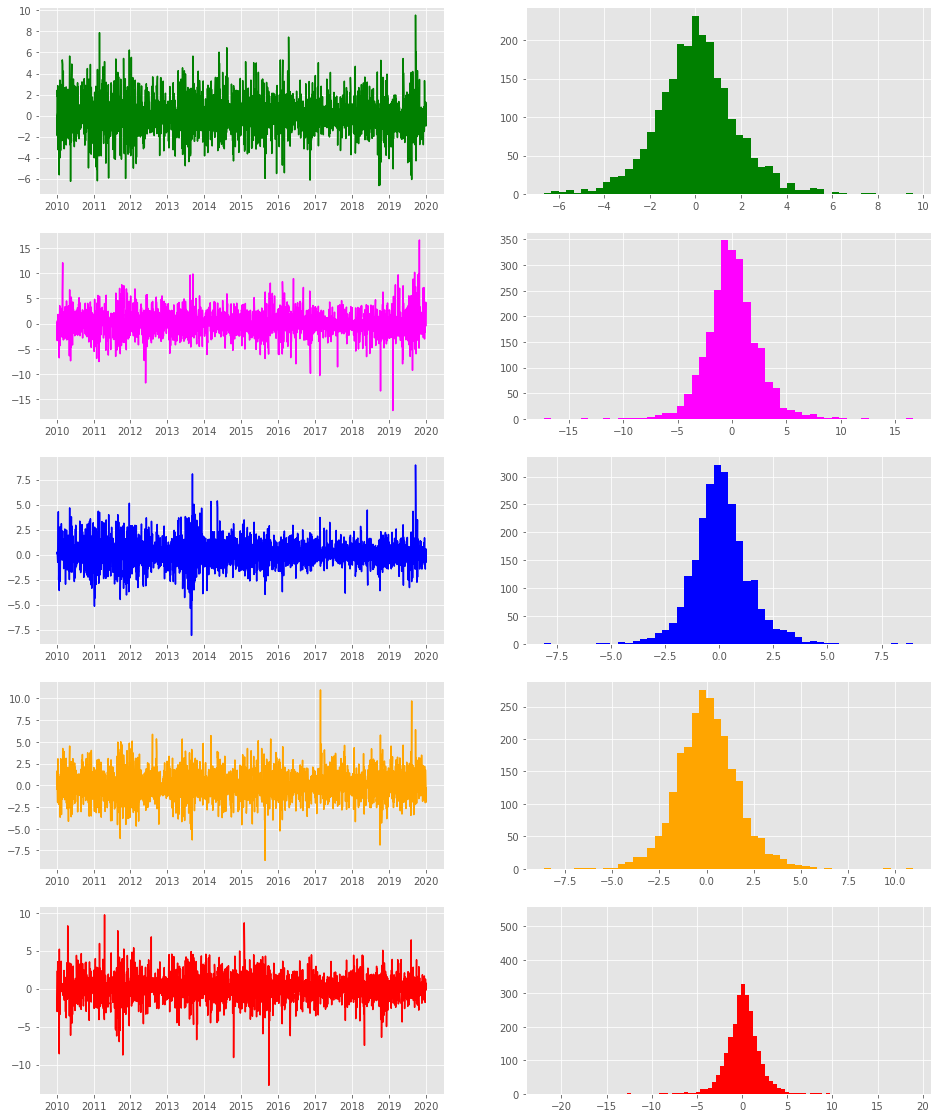

In [197]:
fig = plt.figure(figsize= (16,20))
ax = fig.subplots(5, 2)
plt.margins(x = .5 , y = 0.7)
ax[0][0].plot(mnm['Daily_Percentage_Change'], color = 'green')
ax[0][1].hist(mnm['Daily_Percentage_Change'], bins = 50, color = 'green') 

ax[1][0].plot(tatamotors['Daily_Percentage_Change'], color ='magenta')
ax[1][1].hist(tatamotors['Daily_Percentage_Change'], bins = 50, color ='magenta') 

ax[2][0].plot(hdfcbank['Daily_Percentage_Change'], color='blue')
ax[2][1].hist(hdfcbank['Daily_Percentage_Change'], bins = 50, color='blue') 

ax[3][0].plot(reliance['Daily_Percentage_Change'], color='orange')
ax[3][1].hist(reliance['Daily_Percentage_Change'], bins = 50, color='orange') 

ax[4][0].plot(hcl['Daily_Percentage_Change'], color='red')
ax[4][1].hist(hcl['Daily_Percentage_Change'], bins = 50, color='red') 
plt.savefig('EDA_images/Daily_Percentage_Change.jpg')



In [145]:
def avgAnnualPrice(df):
    cmpName = df["Company Name"].unique()[0]
    df.drop(["Adj Close"], axis=1)
    yearList = data["Date"].dt.year.unique()
    resultDf = df.groupby(df["Date"].dt.year)["Close"].mean()
    ax = f.add_subplot(1,1,1)
    return resultDf.keys(), resultDf.values

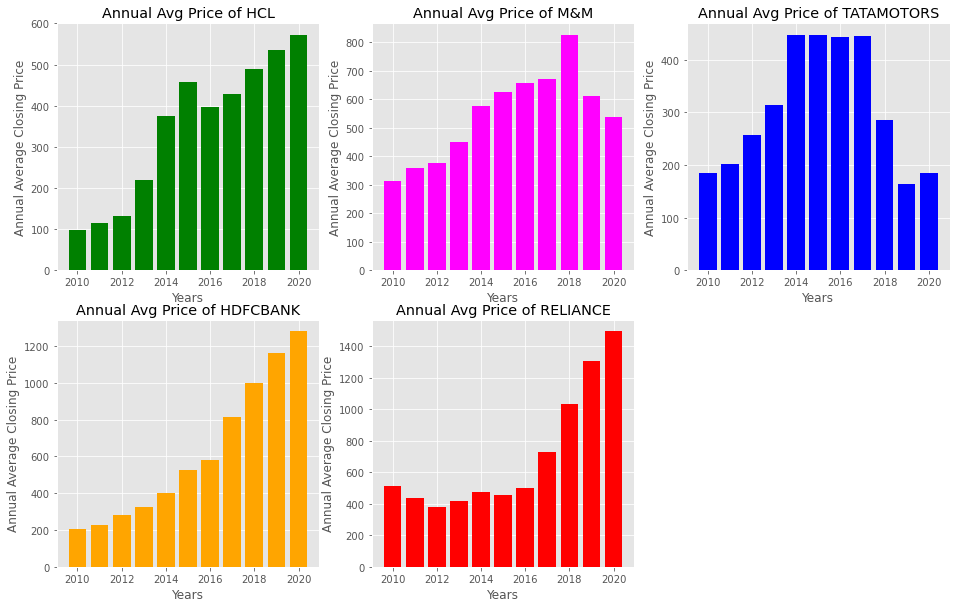

In [198]:
fig = plt.figure(figsize= (16,10))
axes = fig.subplots(2, 3)
plt.margins(x = .2 , y = 0.3)

companies = ['HCL', 'M&M', 'TATAMOTORS', 'HDFCBANK', 'RELIANCE']
colors = ['green', 'magenta', 'blue', 'orange', 'red']
i=0

for ax in axes.flat:
    if i<5:
        x,y = avgAnnualPrice(data[data['Company Name']== companies[i]])
        ax.bar(x,y, color = colors[i])
        ax.set_xlabel('Years')
        ax.set_ylabel('Annual Average Closing Price')
        ax.set_title("Annual Avg Price of " + companies[i])
    i+=1
axes[1][2].remove()

plt.savefig('EDA_images/Annual_Average_Price.jpg')


In [181]:
def annualPercentageIncrease(df):
    perIncrease = []
    cmpName = df["Company Name"].unique()[0]
    df.drop(["Adj Close"], axis=1)
    yearList = ["2010-11", "2011-12", "2012-13", "2013-14", "2014-15", "2015-16", "2016-17", "2017-18", "2018-19", "2019-20"]
    resultDf = df.groupby(df["Date"].dt.year)["Close"].mean()
    for i in range(10):
        per = round((resultDf.iloc[i+1] - resultDf.iloc[i]) / resultDf.iloc[i] * 100,2)
        perIncrease.append(per)
    return yearList, perIncrease

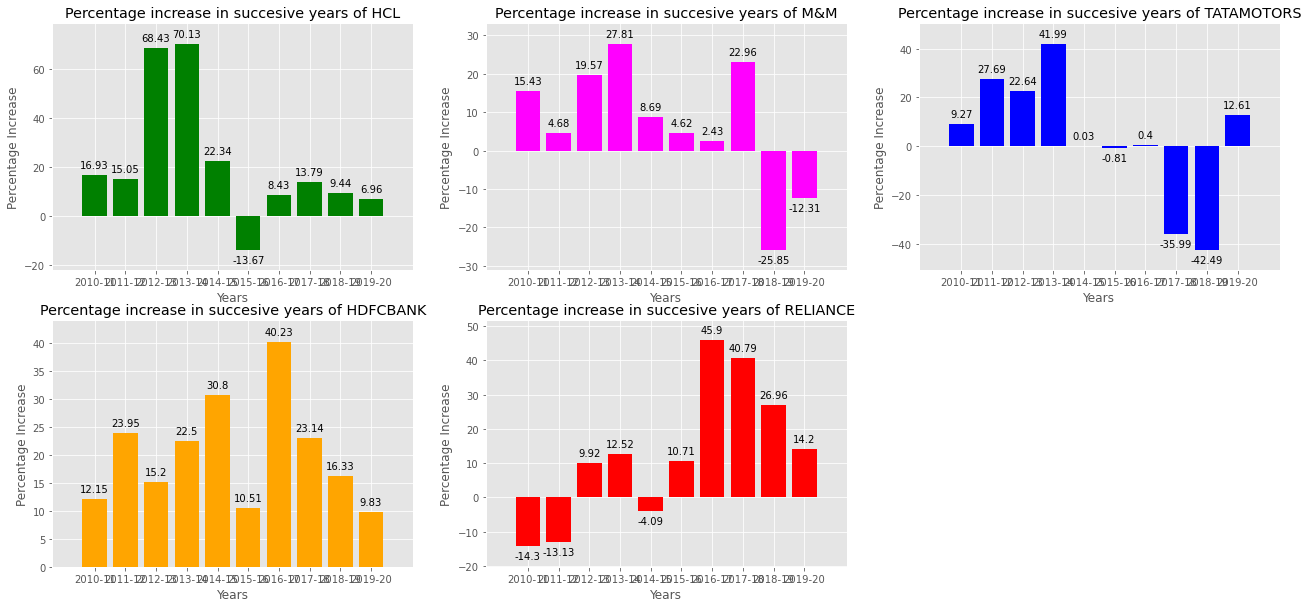

In [199]:
fig = plt.figure(figsize= (22,10))
axes = fig.subplots(2, 3)
plt.margins(x = .3 , y = .5)

companies = ['HCL', 'M&M', 'TATAMOTORS', 'HDFCBANK', 'RELIANCE']
colors = ['green', 'magenta', 'blue', 'orange', 'red']
i=0

for ax in axes.flat:
    if i<5:
        x,y = annualPercentageIncrease(data[data['Company Name']== companies[i]])
        bars = ax.bar(x, y, color=colors[i])
        ax.bar_label(bars, padding=5, fmt='%g')
        ax.margins(x = .1 , y = 0.1)
        ax.set_xlabel("Years")
        ax.set_ylabel("Percentage Increase")
        ax.set_title("Percentage increase in succesive years of " + companies[i])
        i+=1
axes[1][2].remove()

plt.savefig('EDA_images/Percentage_Increase.jpg')

In [209]:
data1 = data.copy()
data1['open-high'] = data1['Open']-data1['High']
data1['open-low'] = data1['Open'] - data1['Low']
data1['close-high'] = data1['Close']-data1['High']
data1['close-low'] = data1['Close'] - data1['Low']
data1['high-low'] = data1['High'] - data1['Low']
data1['open-close'] = data1['Open'] - data1['Close']
data1.head()

Date       High        Low       Open      Close     Volume  \
0 2010-01-04  93.750000  92.012497  93.562500  92.775002  1632148.0   
1 2010-01-05  95.250000  92.637497  93.125000  94.862503  5037896.0   
2 2010-01-06  95.724998  91.250000  95.025002  92.000000  3992320.0   
3 2010-01-07  92.974998  89.800003  92.974998  90.037498  3665940.0   
4 2010-01-08  90.750000  87.312500  90.750000  87.937500  6241492.0   

   Adj Close Company Name  open-high  open-low  close-high  close-low  \
0  73.478745          HCL  -0.187500  1.550003   -0.974998   0.762505   
1  75.132080          HCL  -2.125000  0.487503   -0.387497   2.225006   
2  72.864944          HCL  -0.699997  3.775002   -3.724998   0.750000   
3  71.310638          HCL   0.000000  3.174995   -2.937500   0.237495   
4  69.647415          HCL   0.000000  3.437500   -2.812500   0.625000   

   high-low  open-close  
0  1.737503    0.787498  
1  2.612503   -1.737503  
2  4.474998    3.025002  
3  3.174995    2.937500  
4  3.437500    2.812500

<AxesSubplot:>

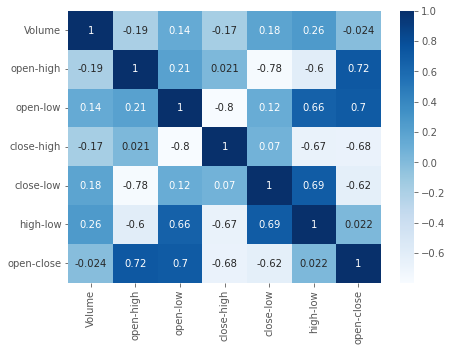

In [210]:
data2 = data1.copy()
data2 = data2.drop(['Open','High','Low','Close', 'Adj Close'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(data2.corr(),cmap='Blues',annot=True)